In [81]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Helvetica')

In [82]:
data_path ='/Users/cosmo/Documents/thesis/data/early_NO2_NO_NH3_freq_meas_data_2021-02-16.xlsx'
raw_response = pd.read_excel(data_path, sheet_name = 1)

In [83]:
raw_response.head()

,NO2,NO,NH3,1,2,3,4,5,6,7,...,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294
0,50,100,25,0.000263,0.000263,0.000263,0.000263,0.000262,0.000262,0.000262,...,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245,0.000245
1,100,25,100,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,...,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260
2,25,100,50,0.000259,0.000259,0.000259,0.000259,0.000259,0.000258,0.000258,...,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000248,0.000247
3,50,25,100,0.000246,0.000246,0.000247,0.000247,0.000247,0.000247,0.000247,...,0.000262,0.000262,0.000262,0.000262,0.000261,0.000261,0.000261,0.000261,0.000260,0.000260
4,100,100,25,0.000257,0.000257,0.000257,0.000257,0.000256,0.000256,0.000256,...,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243,0.000243


In [86]:
x = raw_response.columns[3:]
x

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294],
      dtype='object', length=1294)

In [87]:
y = raw_response.iloc[0][3:]
y

1       0.000263
2       0.000263
3       0.000263
4       0.000263
5       0.000262
          ...   
1290    0.000245
1291    0.000245
1292    0.000245
1293    0.000245
1294    0.000245
Name: 0, Length: 1294, dtype: float64

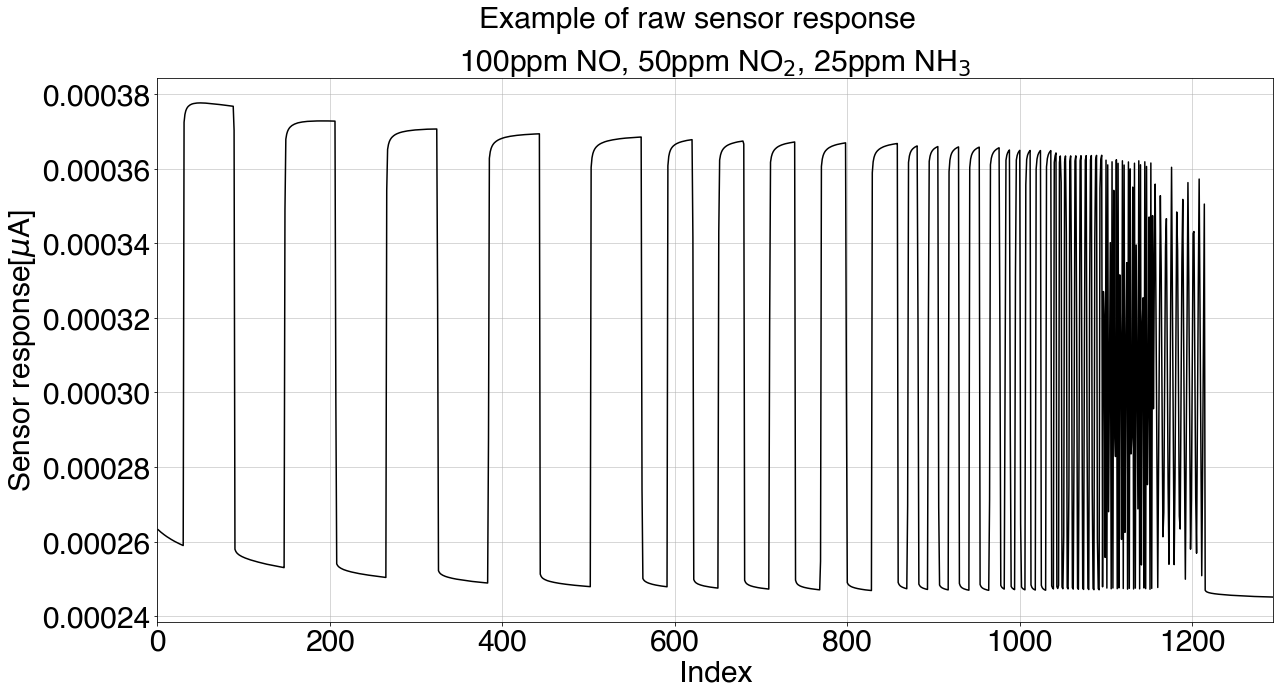

In [107]:
plt.figure(num=None, figsize=(20, 10))
plt.plot(x,y, color = 'black')
plt.xlim(0, 1294)

# Titles, axes, etc.
plt.suptitle('Example of raw sensor response', fontsize=30)
plt.title(r'100ppm NO, 50ppm NO$_2$, 25ppm NH$_3$', fontsize = 30)
plt.xlabel('Index', fontsize = 30)
plt.ylabel(r'Sensor response[$\mu$A]', fontsize = 30)
plt.grid(axis = 'both', which = 'both', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=30)

plt.savefig('../../figures/raw-response.png')
plt.show()


In [20]:
from sklearn import preprocessing
import numpy as np

y_scaled = np.asarray(y)

y_scaled =preprocessing.StandardScaler().fit_transform(y_scaled.reshape(-1,1))

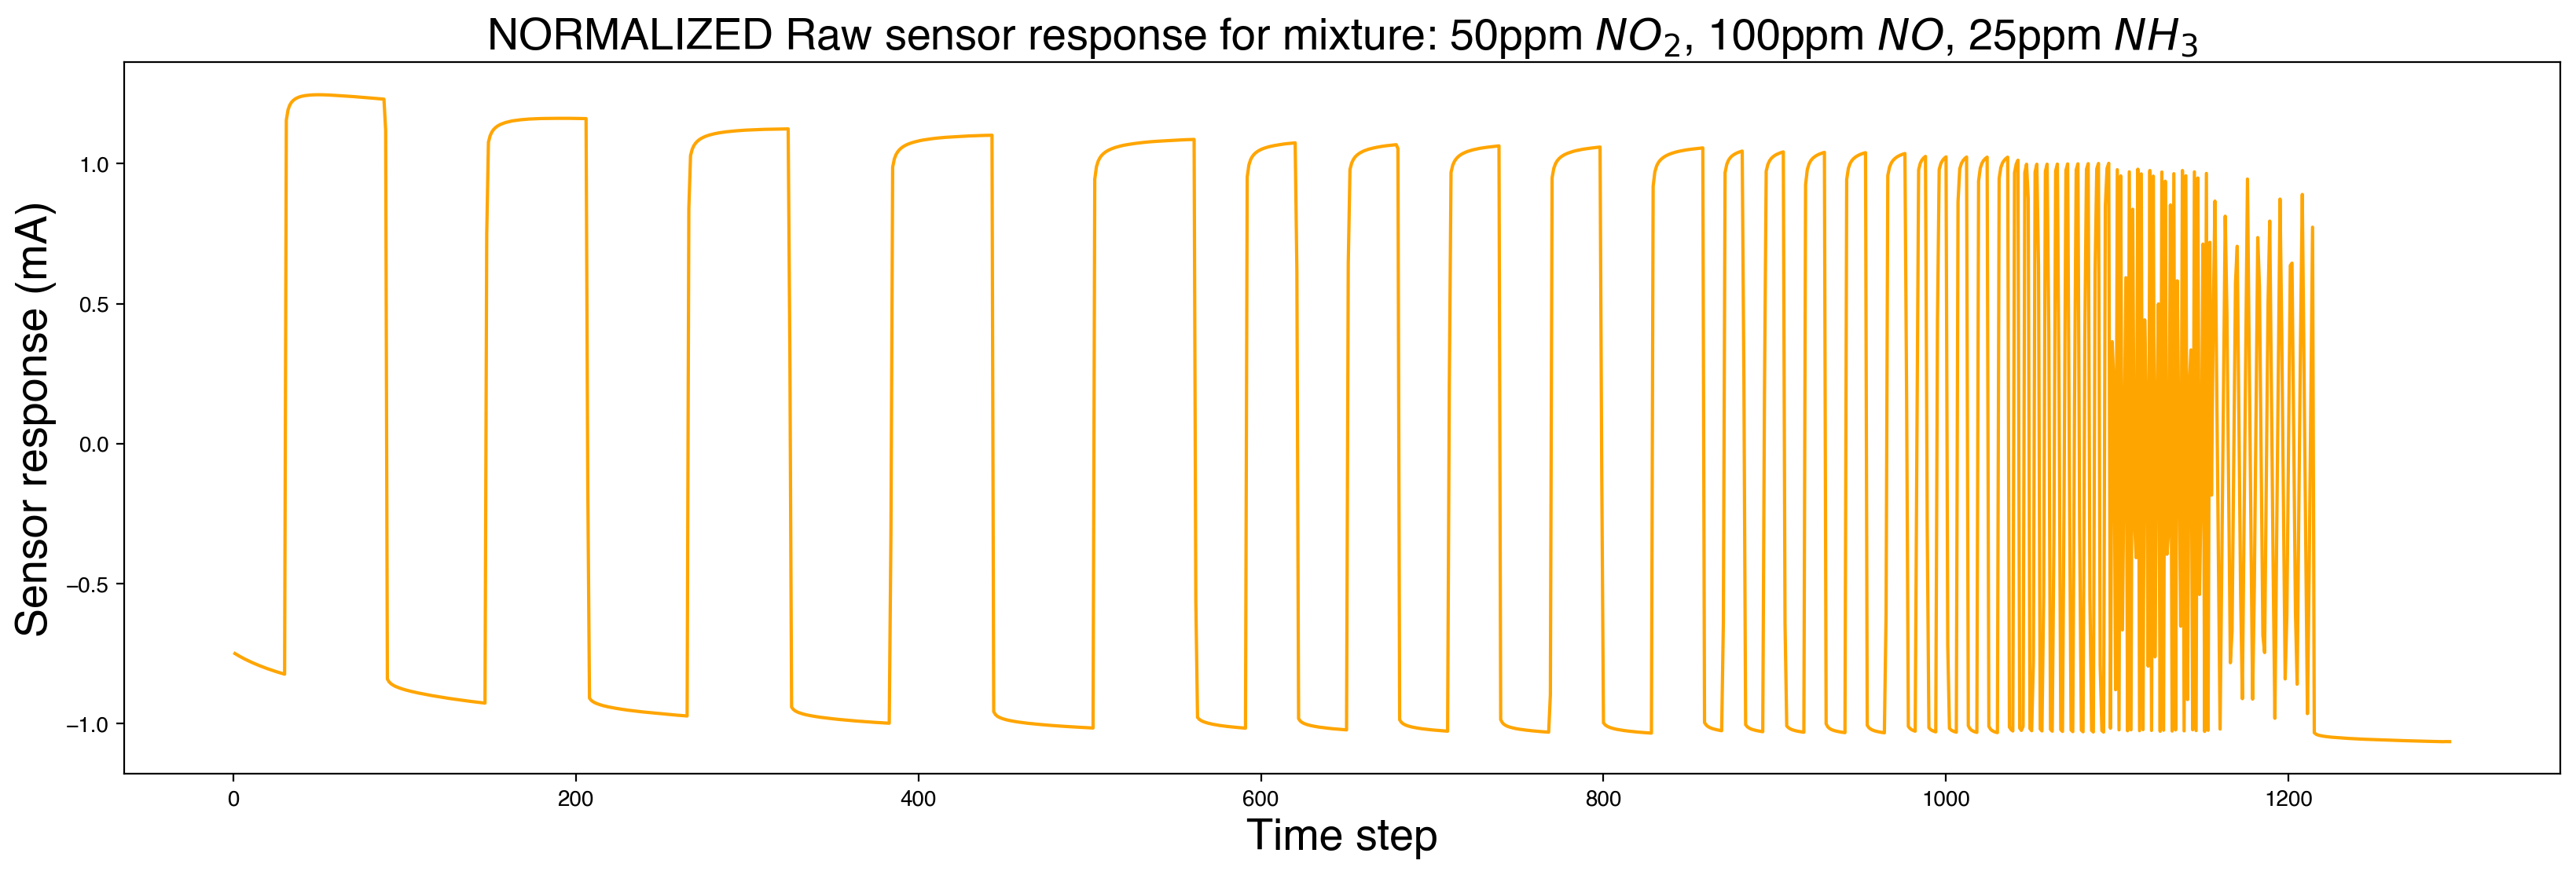

In [21]:
plt.figure(num=None, figsize=(20, 10))
plt.plot(x,y_scaled, color = 'orange')
plt.xlabel('Time step', fontsize=20)
plt.ylabel('Sensor response (mA)', fontsize = 20)
plt.title(r'NORMALIZED Raw sensor response for mixture: 50ppm $NO_2$, 100ppm $NO$, 25ppm $NH_3$', fontsize=20)

#plt.savefig('../figures/raw-response.png')
plt.show()

# Creating dummy dataset

In [22]:
import itertools
import pandas as pd
import numpy as np

# Possible concentrations
concentrations = [10, 20, 40,  80, 160]

# Possible mixtures
mixtures = [p for p in itertools.product(concentrations, repeat=3)]

# Creating df
df = pd.DataFrame(mixtures)
df.rename(columns = {0:'NO', 1:'NO2', 2:'NH3'}, inplace = True)

# Populating with N(0,1)
for i in range(160):
    df[f'Slope{i}'] = np.random.normal(0,1,125)
    df[f'Avg{i}']= np.random.normal(0,1,125)

In [23]:
df.head()

,NO,NO2,NH3,Slope0,Avg0,Slope1,Avg1,Slope2,Avg2,Slope3,...,Slope155,Avg155,Slope156,Avg156,Slope157,Avg157,Slope158,Avg158,Slope159,Avg159
0,10,10,10,0.277219,-1.150310,0.609847,0.603581,-0.770108,-0.441426,-0.888020,...,-0.227529,0.903830,2.645807,-1.084143,1.128086,-1.260240,-0.817060,-1.303982,0.990800,-0.688505
1,10,10,20,0.623686,0.765393,0.454335,-0.494252,-2.160467,0.272170,-0.832849,...,-0.158036,2.385143,-0.475503,0.032145,-0.621477,1.955640,-0.672906,0.849952,-0.584506,0.127037
2,10,10,40,-0.842464,0.756209,0.023231,0.063713,1.083225,-1.721777,-0.451458,...,-0.881930,-2.921323,0.806836,-0.965488,0.089949,-0.168589,0.155842,0.252319,0.697950,0.067717
3,10,10,80,-0.421325,1.238865,-0.395461,0.044705,0.456679,0.227891,0.572561,...,-0.495251,-0.369269,1.506654,-0.467642,0.263273,0.571603,-0.275428,-0.443158,-1.048867,0.135662
4,10,10,160,-0.365272,-0.422516,0.535953,0.446734,-1.142860,-1.305207,0.187758,...,1.296019,0.273438,0.006132,1.437754,1.046125,1.481817,-1.056293,0.441246,-0.707433,1.853348


In [24]:
## from scipy import signal
import matplotlib.pyplot as plt

freqs = [0.05, 0.1, 0.25, 0.5, 1, 2, 5, 10, 25, 50, 100, 200, 500, 1000, 2500, 5000]
durations = [20, 10, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
end_times = np.cumsum(durations)
start_times =  end_times - durations

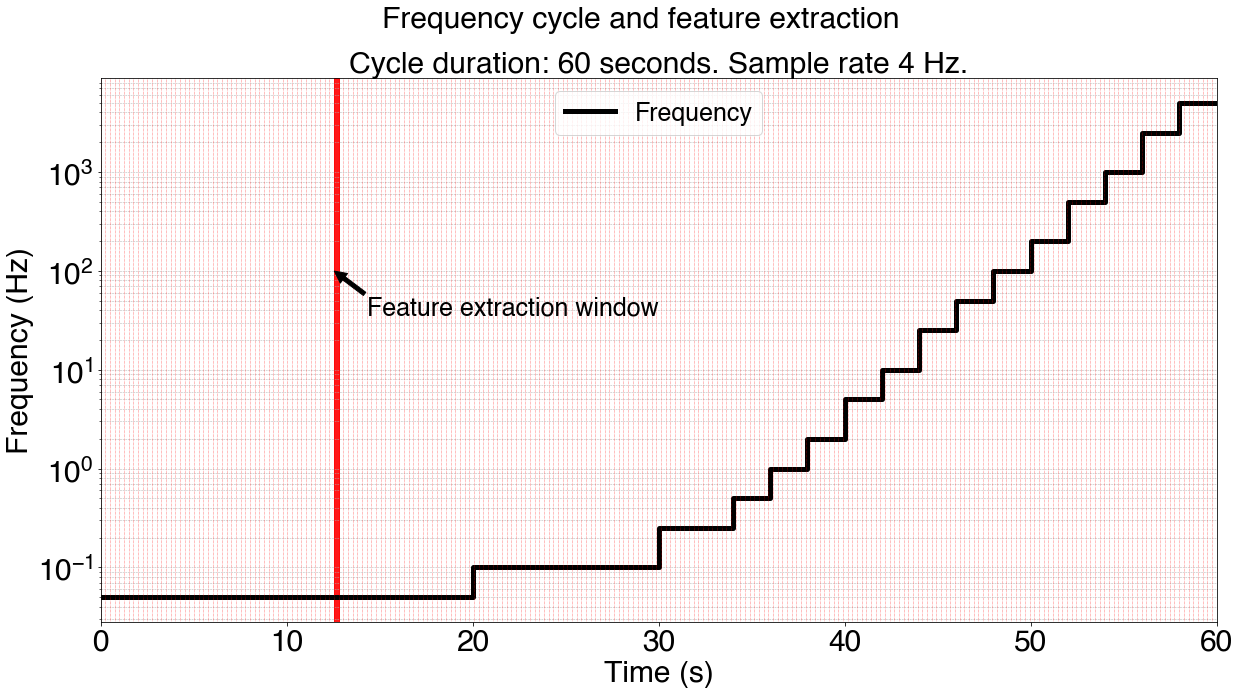

In [79]:
# Plotting measurements time
plt.figure(num=None, figsize=(20, 10))

# Log-scale: too big of a range (0.05,5000)
plt.yscale('log')

# Frequencies represented as steps to avoid "solid block of lines" in high frequencies
plt.step(np.append(start_times, 60), np.append(freqs, 5000), where = 'post', color = 'black', lw = 5, label = 'Frequency')

# Adding measurements time windows
x_coords = np.linspace(0,60,240)
for x in x_coords:
    plt.axvline(x, lw = 0.5, color = 'red', linestyle = ':')
    
# Adding example window to clarify
plt.axvspan(x_coords[50], x_coords[51], alpha=0.9, color='red')
plt.annotate('Feature extraction window', xy=(x_coords[50], 100),  xycoords='data',
            xytext=(0.50, 0.60), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.01),
            horizontalalignment='right', verticalalignment='top', fontsize = 25
            )

    
# Titles, axes, etc.
plt.suptitle('Frequency cycle and feature extraction', fontsize=30)
plt.title('Cycle duration: 60 seconds. Sample rate 4 Hz.', fontsize = 30)
plt.xlabel('Time (s)', fontsize = 30)
plt.ylabel('Frequency (Hz)', fontsize = 30)
plt.grid(axis = 'y', which = 'both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlim((0,60))
plt.legend(prop={'size': 25}, loc = 'best')
plt.savefig('../../figures/measurement-windows.png')
plt.show()